In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
import pandas as pd
import math
from scipy import interpolate

from SimContatore import SimContatore

In [2]:
# times = array tempi in cui viene rilevato il conteggio
# n_counts = numero di conteggi per delta_t
def get_delta_t(times,n_counts):
    delta_t = []
    x = 0
    while x < len(times)-n_counts:
        
        delta_t.append(times[x+n_counts]-times[x])        
        x = x + n_counts
        
    return np.array(delta_t)

def plot_conteggi(t, rbest,n_counts):
    
    binsize = np.std(t,ddof=1)/2 
    interval = t.max() - t.min()
    nbins = int(interval / binsize)
    norm_factor = t.size * binsize
    
    
    
    if n_counts == 1:
        x_attesa = np.linspace(0,6,1000)
        y_attesa = norm_factor*np.exp(-x_attesa*rbest)
    else: 
        x_attesa = np.linspace(0,8,1000)
        y_attesa = norm_factor*(rbest**2*x_attesa*np.exp(-rbest*x_attesa))
    
    counts , bins , patches = plt.hist(t,bins=nbins,color="blue",edgecolor="y",alpha=0.75)
    
    x = np.array([ bins[n-1]+((bins[n]-bins[n-1])/2) for n in range(1,len(bins))])
    
    sy=np.sqrt(counts)

    plt.errorbar(x, counts, yerr=sy, marker='o',color="r",markersize=3,linestyle='none',label="Incertezza sul conteggio")

    plt.plot(x_attesa,y_attesa,"--",color="g",label="Curva attesa normalizzata")
    plt.xlabel('Tempo di attesa [s]')
    plt.ylabel('Entries')
    plt.title(label='Istogramma tempi di attesa per '+str(n_counts)+' conteggio')
    plt.legend()
    
        


In [8]:
myContatore = SimContatore()

mycounts_O, mytimes_O = myContatore.MisuraConteggi(600,1,"O")
rbest = 1.014

1 misure ripetute di conteggio in un intervallo temporale di 600.0 s =
[601]


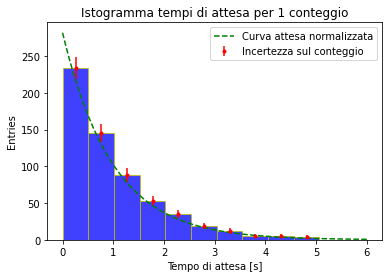

In [9]:
#1 conteggio
my_dt = get_delta_t(mytimes_O[0],1)
plot_conteggi(my_dt,rbest,1)

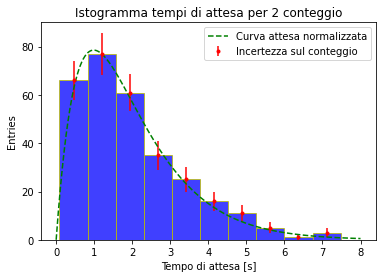

In [10]:
#2 conteggi
my_dt2 = get_delta_t(mytimes_O[0],2)
plot_conteggi(my_dt2,rbest,2)